In [20]:
import numpy as np
import random
from grid_world import GridWorld
from IPython.display import clear_output

In [21]:
rows = 5
cols = 5
env = GridWorld(forbidden_score=-5000, terminal_score=100, desc = [".....",".##..","..#..",".#T#.",".#..."])
env.render_grid()
policy = np.eye(5)[np.random.randint(0, 5, size=(rows * cols))]
env.render_policy(policy)

⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️
⬅️➡️➡️➡️⬅️
⬅️⏬🔄⬅️⬇️
⬅️➡️🔄🔄⬆️
⬅️⏩️✅⏩️⬇️
⬇️⏬🔄⬇️🔄


In [22]:
policy = 0.2 * np.ones((rows * cols, 5))
episodes = [
    env.get_traj(
        random.randint(0, 24),
        action=random.randint(0, 4),
        policy=policy,
        steps=500,
    )
    for i in range(500)
]


In [23]:
state_value = np.random.randn(25)
learning_rate = 0.01
gamma = 0.99
for i in range(500):
    for trajectory in episodes[i]:
        tmpstate, tmpaction, tmpscore, nextState, nextAction = trajectory
        TD_error = state_value[tmpstate] - (tmpscore + gamma * state_value[nextState])
        state_value[tmpstate] = state_value[tmpstate] - learning_rate * TD_error


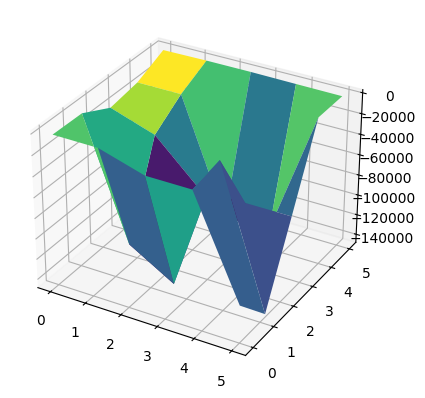

In [24]:
state_value = np.round(state_value, decimals=3).reshape(5, 5)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
x = np.linspace(0, 5, 5)
y = np.linspace(0, 5, 5)

X, Y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(Y, X, state_value, cmap="viridis")

In [25]:
gamma = 0.999
trajectorySteps = 20000
learning_rate = 0.01
num_episodes = 60000
policy = np.eye(5)[np.random.randint(0, 5, size=(rows * cols))]
state_value = np.zeros((rows * cols))
qtable = np.zeros((rows * cols, 5))
print("random policy")
env.render_grid()
env.render_policy(policy)


random policy
⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️
⬇️⬆️⬇️⬆️⬆️
⬇️⏪⏫️➡️⬆️
⬆️🔄⏩️⬆️⬅️
⬅️⏩️✅⏪🔄
⬆️⏫️⬆️⬆️⬅️


In [26]:
epsilon = 1
for episode in episodes:
    if epsilon > 0.0001:
        epsilon -= 0.0001
    else:
        epsilon = 0.0001

    p1 = 1 - epsilon * 4 / 5
    p0 = epsilon / 5
    print(f"epsilon: {epsilon:.4f}, p0: {p0:.4f}, p1: {p1:.4f}")

    d = {1: p1, 0: p0}
    policy_epsilon = np.vectorize(d.get)(policy)

    i = random.randint(0, 24)
    j = random.randint(0, 4)

    cnt = [0 for i in range(25)]

    traj = env.get_traj(i, j, policy_epsilon, trajectorySteps, True)
    print("trajectorySteps", len(traj))

    if len(traj) > 5000:
        continue

    clear_output(wait=True)
    state_value[17] = 100

    steps = len(traj) - 1
    for k in range(steps,-1,-1):
        tmpstate, tmpaction, tmpscore, nextState, nextAction = traj[k]
        cnt[tmpstate] += 1
        TD_error = state_value[tmpstate] - (tmpscore + gamma * state_value[nextState])
        state_value[tmpstate] = state_value[tmpstate] - learning_rate * TD_error

    print(np.array(cnt).reshape(5,5))
    for i in range(rows * cols):
        for j in range(5):
            score,nextState = env.get_reward(i,j)
            qtable[i][j] = score + gamma * state_value[nextState]

    print(state_value.reshape(5,5))
    env.render_policy(policy)
    print(np.array(state_value).mean())

    policy = np.eye(5)[np.argmax(qtable,axis=1)]
    policy_epsilon = np.vectorize(d.get)(policy)


[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]]
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0. 49.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
➡️➡️➡️➡️⬇️
⬆️⏫️⏫️⬆️⬆️
⬆️⬅️⏬⬆️⬆️
⬆️⏩️✅⏪⬆️
⬆️⏩️⬆️➡️⬆️
1.96
epsilon: 0.9500, p0: 0.1900, p1: 0.2400
trajectorySteps 20001
